In [2]:
import pandas as pd
import numpy as np

# Create synthetic data
np.random.seed(0)
n_records = 1000
data = {
    'Product_ID': range(1, n_records + 1),
    'Supplier_ID': np.random.randint(1, 21, n_records),
    'Quantity_Supplied': np.random.randint(100, 1000, n_records),
    'Factory_ID': np.random.randint(1, 11, n_records),
    'Production_Cost': np.random.uniform(100, 500, n_records),
    'Warehouse_ID': np.random.randint(1, 6, n_records),
    'Shipping_Cost': np.random.uniform(5, 30, n_records),
    'Customer_ID': np.random.randint(1, 101, n_records),
    'Price_Sold': np.random.uniform(200, 1000, n_records)
}

df = pd.DataFrame(data)


Mean Price Sold: 591.7300501682455
Total Supply Chain Cost: 319882.7512106752
Max Quantity Supplied: 995
Min Quantity Supplied: 100


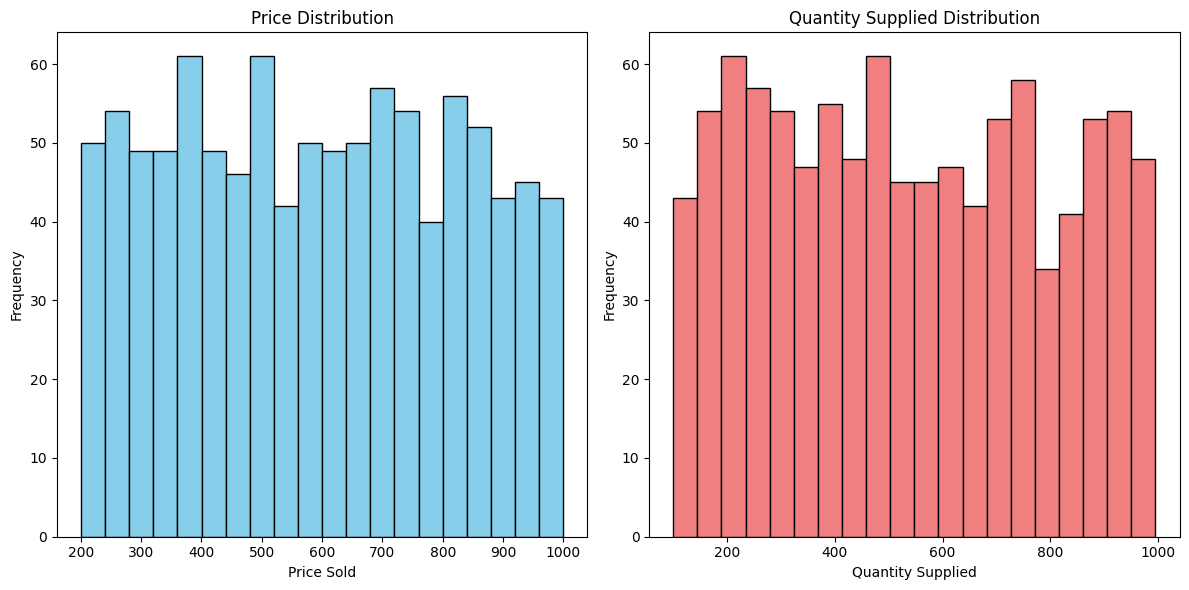

In [6]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# Descriptive analytics
mean_price = df['Price_Sold'].mean()
total_cost = (df['Production_Cost'] + df['Shipping_Cost']).sum()
max_quantity_supplied = df['Quantity_Supplied'].max()
min_quantity_supplied = df['Quantity_Supplied'].min()

# Visualize price distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Price_Sold'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price Sold')
plt.ylabel('Frequency')

# Visualize quantity supplied distribution
plt.subplot(1, 2, 2)
plt.hist(df['Quantity_Supplied'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Quantity Supplied Distribution')
plt.xlabel('Quantity Supplied')
plt.ylabel('Frequency')

plt.tight_layout()

print("Mean Price Sold:", mean_price)
print("Total Supply Chain Cost:", total_cost)
print("Max Quantity Supplied:", max_quantity_supplied)
print("Min Quantity Supplied:", min_quantity_supplied)


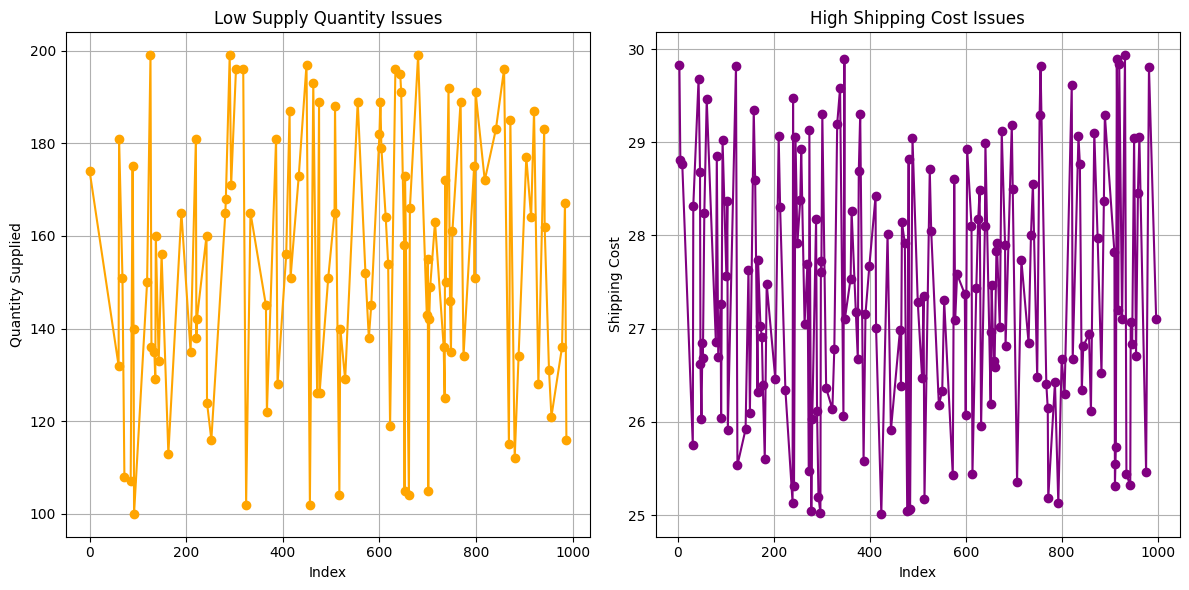

In [7]:
# Diagnostic analytics
low_supply = df[df['Quantity_Supplied'] < 200]
high_shipping_cost = df[df['Shipping_Cost'] > 25]

# Visualize low supply quantity issues over time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(low_supply.index, low_supply['Quantity_Supplied'], color='orange', marker='o')
plt.title('Low Supply Quantity Issues')
plt.xlabel('Index')
plt.ylabel('Quantity Supplied')
plt.grid()

# Visualize high shipping cost issues over time
plt.subplot(1, 2, 2)
plt.plot(high_shipping_cost.index, high_shipping_cost['Shipping_Cost'], color='purple', marker='o')
plt.title('High Shipping Cost Issues')
plt.xlabel('Index')
plt.ylabel('Shipping Cost')
plt.grid()

plt.tight_layout()

plt.show()


35/35 [==============================] - 0s 665us/step


C:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


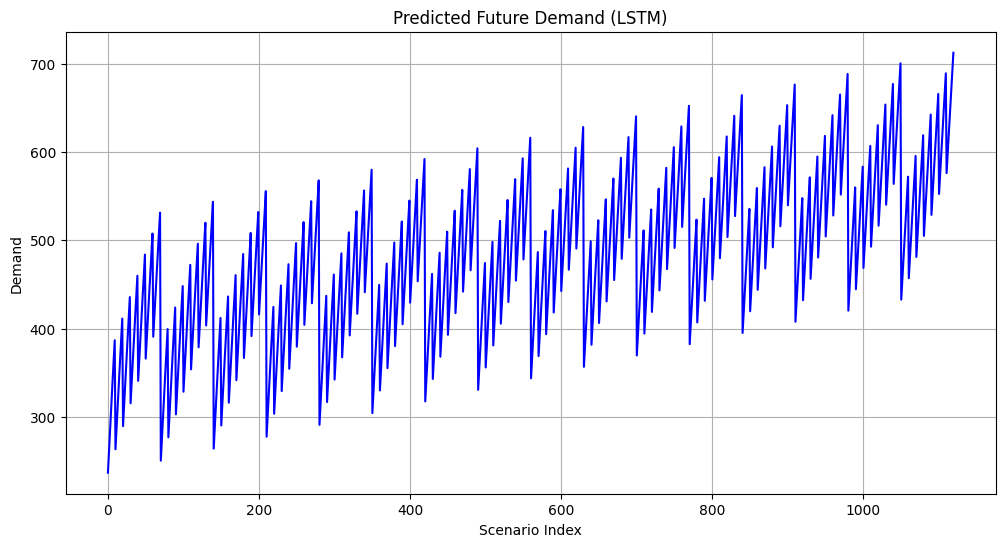

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate synthetic data as you did previously
np.random.seed(0)
n_records = 1000
data = {
    'Price_Sold': np.random.uniform(200, 1000, n_records),
    'Production_Cost': np.random.uniform(100, 500, n_records),
    'Shipping_Cost': np.random.uniform(5, 30, n_records),
    'Quantity_Supplied': np.random.randint(100, 1000, n_records)
}
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['Price_Sold', 'Production_Cost', 'Shipping_Cost']]
y = df['Quantity_Supplied']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Generate a range of future demand features
future_demand_features = [[price, production_cost, shipping_cost] for price in range(200, 1000, 50)
                                                   for production_cost in range(150, 500, 50)
                                                   for shipping_cost in range(10, 30, 2)]

# Scale the future demand features
scaled_future_demand_features = scaler.transform(future_demand_features)
scaled_future_demand_features = scaled_future_demand_features.reshape(len(future_demand_features), 1, 3)

# Predict future demand using the LSTM model
predicted_demand = model.predict(scaled_future_demand_features)

# Create a line chart for the predicted future demand
plt.figure(figsize=(12, 6))
plt.plot(predicted_demand, color='blue')
plt.title('Predicted Future Demand (LSTM)')
plt.xlabel('Scenario Index')
plt.ylabel('Demand')
plt.grid()
plt.show()

# Print the predicted future demand for the specific features
specific_features = [[800, 300, 15]]


35/35 [==============================] - 0s 673us/step


C:\Users\serge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\serge\AppData\Local\Temp\ipykernel_4696\2451522050.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c=colors, cmap='viridis', marker='o')


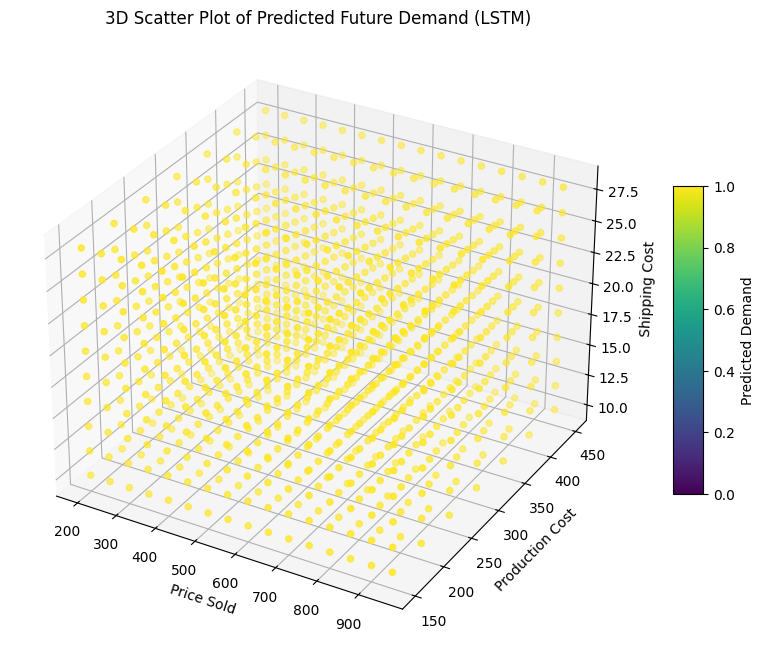

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for future demand features
price_range = range(200, 1000, 50)
production_cost_range = range(150, 500, 50)
shipping_cost_range = range(10, 30, 2)

# Create a grid of future demand features
X, Y, Z = np.meshgrid(price_range, production_cost_range, shipping_cost_range)

# Flatten the grid to get a list of scenarios
scenarios = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))

# Scale the future demand features
scaled_scenarios = scaler.transform(scenarios)

# Reshape the scaled scenarios for LSTM input
scaled_scenarios = scaled_scenarios.reshape(len(scenarios), 1, 3)

# Predict future demand using the LSTM model
predicted_demand = model.predict(scaled_scenarios)

# Reshape the predicted demand to match the grid shape
predicted_demand = predicted_demand.reshape(X.shape)

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap for color mapping
colormap = plt.get_cmap('viridis')

# Create the surface plot with specified facecolors
surf = ax.plot_surface(X, Y, Z, facecolors=colormap(predicted_demand), rstride=1, cstride=1, alpha=0.8, antialiased=True)

# Add labels to the axes
ax.set_xlabel('Price Sold')
ax.set_ylabel('Production Cost')
ax.set_zlabel('Shipping Cost')

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.set_label('Predicted Demand')

# Set the title
plt.title('3D Surface Plot of Predicted Future Demand (LSTM)')

plt.show()


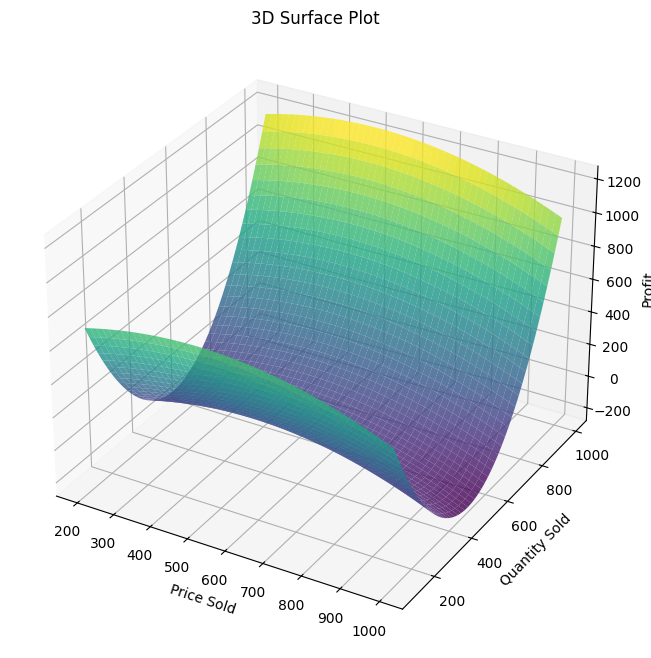

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values for price, quantity sold, and production cost
price = np.linspace(df['Price_Sold'].min(), df['Price_Sold'].max(), 50)
quantity = np.linspace(df['Quantity_Supplied'].min(), df['Quantity_Supplied'].max(), 50)
production_cost = np.linspace(df['Production_Cost'].min(), df['Production_Cost'].max(), 50)

# Create a meshgrid from the variables
X, Y = np.meshgrid(price, quantity)

# Calculate a hypothetical dependent variable (e.g., profit) for the surface plot
# Replace this with your own business logic or a relevant metric
# In this example, we'll use a simple quadratic function as an example
Z = -0.001 * (X - 500) ** 2 + 0.005 * (Y - 500) ** 2

# Create the 3D surface plot resembling a cone
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, antialiased=True)

# Add labels to the axes
ax.set_xlabel('Price Sold')
ax.set_ylabel('Quantity Sold')
ax.set_zlabel('Profit')

# Set the title
plt.title('3D Surface Plot ')

plt.show()

